In [1]:
from pyspark import SparkContext
from pyspark.sql import SQLContext, Row
import pandas as pd
import numpy as np

from pyspark.sql.functions import when, udf, col, regexp_replace
from pyspark.sql.types import DoubleType,IntegerType, StringType 

In [2]:
sc = SparkContext( 'local' )  # spark://ip7070
sqlCtx = SQLContext( sc )

In [3]:
df = sqlCtx.read.csv('data/births.txt',inferSchema=True)
df

DataFrame[_c0: int, _c1: double, _c2: double]

In [4]:
df = df.withColumnRenamed('_c0','year').\
        withColumnRenamed('_c1','boys').\
        withColumnRenamed('_c2','girls')

In [5]:
df.printSchema()

root
 |-- year: integer (nullable = true)
 |-- boys: double (nullable = true)
 |-- girls: double (nullable = true)



In [6]:
df.show(df.count())

+----+---------+---------+
|year|     boys|    girls|
+----+---------+---------+
|1880|  90993.0| 110491.0|
|1881|  91954.0| 100745.0|
|1882| 107850.0| 113688.0|
|1883| 112321.0| 104629.0|
|1884| 129022.0| 114445.0|
|1885| 133055.0| 107800.0|
|1886| 144535.0| 110784.0|
|1887| 145982.0| 101414.0|
|1888| 178627.0| 120853.0|
|1889| 178366.0| 110584.0|
|1890| 190377.0| 111025.0|
|1891| 185482.0| 101196.0|
|1892| 212346.0| 122037.0|
|1893| 212906.0| 112317.0|
|1894| 222922.0| 115772.0|
|1895| 233630.0| 117398.0|
|1896| 237920.0| 119570.0|
|1897| 234202.0| 112758.0|
|1898| 258770.0| 122693.0|
|1899| 233023.0| 106212.0|
|1900| 299828.0| 150499.0|
|1901| 239348.0| 106471.0|
|1902| 264077.0| 122659.0|
|1903| 261973.0| 119234.0|
|1904| 275371.0| 128125.0|
|1905| 291629.0| 132319.0|
|1906| 295303.0| 133159.0|
|1907| 318566.0| 146833.0|
|1908| 334313.0| 154344.0|
|1909| 347228.0| 163999.0|
|1910| 396501.0| 194218.0|
|1911| 418299.0| 225968.0|
|1912| 558103.0| 429945.0|
|1913| 624518.0| 512557.0|
|

1. 2000년도 이후 데이터를 구하시오.

In [7]:
df.where('year>=2000').show()

+----+---------+---------+
|year|     boys|    girls|
+----+---------+---------+
|2000|1814601.0|1962406.0|
|2001|1799049.0|1941251.0|
|2002|1795206.0|1939815.0|
|2003|1825359.0|1973434.0|
|2004|1834145.0|1982794.0|
|2005|1845379.0|1994841.0|
|2006|1898463.0|2052377.0|
|2007|1919408.0|2072139.0|
|2008|1887234.0|2036289.0|
|2009|1832925.0|1979303.0|
|2010|1772738.0|1913851.0|
|2011|1753500.0|1893230.0|
+----+---------+---------+



2. 1995 ~ 2000 년도 데이터를 구하시오

In [8]:
df.where(" year between 1995 and 2000 ").show()

+----+---------+---------+
|year|     boys|    girls|
+----+---------+---------+
|1995|1757927.0|1902832.0|
|1996|1752249.0|1893378.0|
|1997|1739806.0|1884122.0|
|1998|1765915.0|1910250.0|
|1999|1772632.0|1918809.0|
|2000|1814601.0|1962406.0|
+----+---------+---------+



3. 남아 출생이 가장 많은 top5를 구하시오. ( 년도, 남아수 출력)

In [9]:
df.select('year', 'boys').orderBy('boys', ascending=False).show(5)

+----+---------+
|year|     boys|
+----+---------+
|1957|2044160.0|
|1959|2023044.0|
|1960|2022093.0|
|1961|2017316.0|
|1958|2010884.0|
+----+---------+
only showing top 5 rows



4. 남아율(%) 컬럼을 추가하고, 각 년도별 남아수가 차지하는 비율을 보여주시오.

In [10]:
df.withColumn('남아율(%)', df['boys']/(df['boys']+df['girls'])*100).toPandas()

,year,boys,girls,남아율(%)
0,1880,90993.0,110491.0,45.161402
1,1881,91954.0,100745.0,47.718981
2,1882,107850.0,113688.0,48.682393
3,1883,112321.0,104629.0,51.772759
4,1884,129022.0,114445.0,52.993630
...,...,...,...,...
127,2007,1919408.0,2072139.0,48.086819
128,2008,1887234.0,2036289.0,48.100495
129,2009,1832925.0,1979303.0,48.080152
130,2010,1772738.0,1913851.0,48.086131


5. 2000년도 이후 데이터를 바차트로 보여주시오.

In [11]:
import matplotlib.pyplot as plt

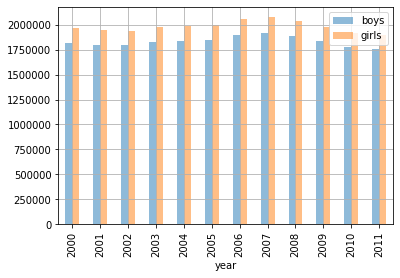

In [12]:
data = df.where('year>=2000').toPandas()
data = data.set_index('year')
data.plot(kind='bar', alpha=0.5)
plt.grid()
plt.show()

In [13]:
import pyspark.sql.functions as F

In [14]:
df.collect()

[Row(year=1880, boys=90993.0, girls=110491.0),
 Row(year=1881, boys=91954.0, girls=100745.0),
 Row(year=1882, boys=107850.0, girls=113688.0),
 Row(year=1883, boys=112321.0, girls=104629.0),
 Row(year=1884, boys=129022.0, girls=114445.0),
 Row(year=1885, boys=133055.0, girls=107800.0),
 Row(year=1886, boys=144535.0, girls=110784.0),
 Row(year=1887, boys=145982.0, girls=101414.0),
 Row(year=1888, boys=178627.0, girls=120853.0),
 Row(year=1889, boys=178366.0, girls=110584.0),
 Row(year=1890, boys=190377.0, girls=111025.0),
 Row(year=1891, boys=185482.0, girls=101196.0),
 Row(year=1892, boys=212346.0, girls=122037.0),
 Row(year=1893, boys=212906.0, girls=112317.0),
 Row(year=1894, boys=222922.0, girls=115772.0),
 Row(year=1895, boys=233630.0, girls=117398.0),
 Row(year=1896, boys=237920.0, girls=119570.0),
 Row(year=1897, boys=234202.0, girls=112758.0),
 Row(year=1898, boys=258770.0, girls=122693.0),
 Row(year=1899, boys=233023.0, girls=106212.0),
 Row(year=1900, boys=299828.0, girls=15049

In [15]:
df.agg({'girls':'sum'}).show()

+------------+
|  sum(girls)|
+------------+
|1.64392696E8|
+------------+



In [16]:
df.agg(F.sum('girls')).show()

+------------+
|  sum(girls)|
+------------+
|1.64392696E8|
+------------+



In [17]:
df.agg({'girls':'sum'}).toPandas()

,sum(girls)
0,164392696.0


In [18]:
df.agg({'girls':'sum'}).collect()

[Row(sum(girls)=164392696.0)]

In [19]:
# 동일 컬럼시 전부 출력이 안됨. 
df.agg({'girls':'sum', 'girls':'avg'}).show()  

+------------------+
|        avg(girls)|
+------------------+
|1245399.2121212122|
+------------------+



In [20]:
df.agg(F.sum('girls'), F.mean('girls')).show()

+------------+------------------+
|  sum(girls)|        avg(girls)|
+------------+------------------+
|1.64392696E8|1245399.2121212122|
+------------+------------------+



In [21]:
df.agg({'girls':'stddev', 'boys':'mean'}).show()

+------------------+-----------------+
|         avg(boys)|    stddev(girls)|
+------------------+-----------------+
|1225776.0681818181|740002.8662878576|
+------------------+-----------------+



In [22]:
df.agg(F.stddev('girls'), F.mean('boys')).show()

+------------------+------------------+
|stddev_samp(girls)|         avg(boys)|
+------------------+------------------+
| 740002.8662878576|1225776.0681818181|
+------------------+------------------+



In [23]:
r = df.agg({'girls':'stddev', 'boys':'mean'}).collect()[0]
print( r['avg(boys)'] )
print( r['stddev(girls)'] )

1225776.0681818181
740002.8662878576


In [24]:
df.agg(F.sum('girls').alias('여아총합'), F.mean('girls').alias('여아평균')).show()

+------------+------------------+
|    여아총합|          여아평균|
+------------+------------------+
|1.64392696E8|1245399.2121212122|
+------------+------------------+

